In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as keras
import os

导入数据

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

数据拆分

In [3]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


归一化

In [4]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

构建模型

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape= [28, 28]),
    keras.layers.Dense(256, activation= tf.nn.relu),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(10, activation= tf.nn.softmax)
])

model.compile(optimizer= "adam", loss= "sparse_categorical_crossentropy", metrics= ["accuracy"])

训练模型

In [6]:
logdir = os.path.join("callback")
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only= True),
    keras.callbacks.EarlyStopping(patience= 5, min_delta=1e-3)
]
history = model.fit(x_train_scaled, y_train, epochs=1000, validation_data=(x_valid_scaled, y_valid), callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/1000
55000/55000 [==============================] - 5s 86us/sample - loss: 0.4569 - accuracy: 0.8333 - val_loss: 0.3527 - val_accuracy: 0.8726
Epoch 2/1000
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3507 - accuracy: 0.8698 - val_loss: 0.3403 - val_accuracy: 0.8796
Epoch 3/1000
55000/55000 [==============================] - 4s 71us/sample - loss: 0.3168 - accuracy: 0.8812 - val_loss: 0.3125 - val_accuracy: 0.8878
Epoch 4/1000
55000/55000 [==============================] - 5s 94us/sample - loss: 0.2920 - accuracy: 0.8914 - val_loss: 0.3162 - val_accuracy: 0.8906
Epoch 5/1000
55000/55000 [==============================] - 6s 110us/sample - loss: 0.2729 - accuracy: 0.8970 - val_loss: 0.3145 - val_accuracy: 0.8912
Epoch 6/1000
55000/55000 [==============================] - 7s 120us/sample - loss: 0.2558 - accuracy: 0.9039 - val_loss: 0.3276 - val_accuracy: 0.8816
Epoch 7/1000
55000/55000 [=================

显示训练过程

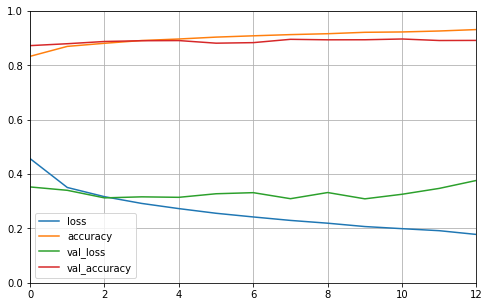

In [7]:
def plot_learnning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learnning_curves(history)

In [8]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3985759813785553, 0.8852]